In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


LOGDIR = Path(
    '/home/michal/studia/machine_learning_lab/'
    'NEAT/neat_improved/logs/neat'
)

AC_LOGDIR = Path(
    '/home/michal/studia/machine_learning_lab/'
    'NEAT/neat_improved/logs/actor_critic'
)


def load_neat_logs(logdir):
    paths = logdir.rglob('*population.csv')
    dfs = []
    for path in paths:
        df = pd.read_csv(path)
        df['env'] = path.parent.parent.stem
        df['start_time'] = path.parent.stem
        dfs.append(df)

    return pd.concat(dfs)


def load_ac_logs(logdir):
    paths = logdir.rglob('*actor_critic.csv')
    dfs = []
    for path in paths:
        df = pd.read_csv(path, names=['iteration', 'fitness', 'time_in_s'])
        df['env'] = path.parent.parent.stem
        df['start_time'] = path.parent.stem
        dfs.append(df)

    return pd.concat(dfs)


def plot_environment(group):
    plt.figure(figsize=(12, 7))
    plt.title(group.name)
    sns.lineplot(
        x='iteration',
        y='fitness',
        data=group,
        estimator='mean',
    )
    plt.show()

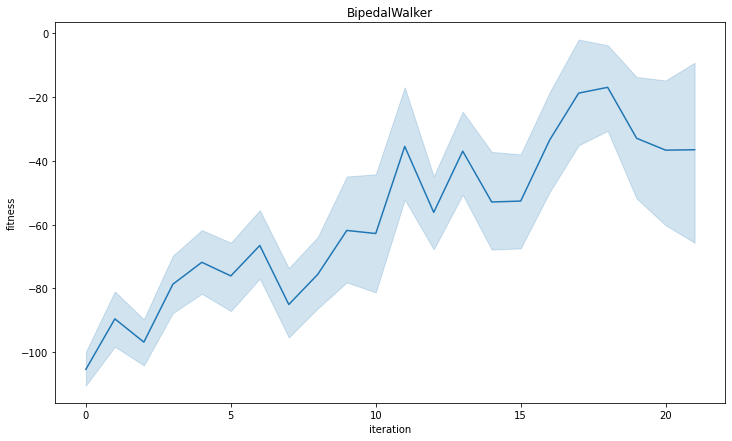

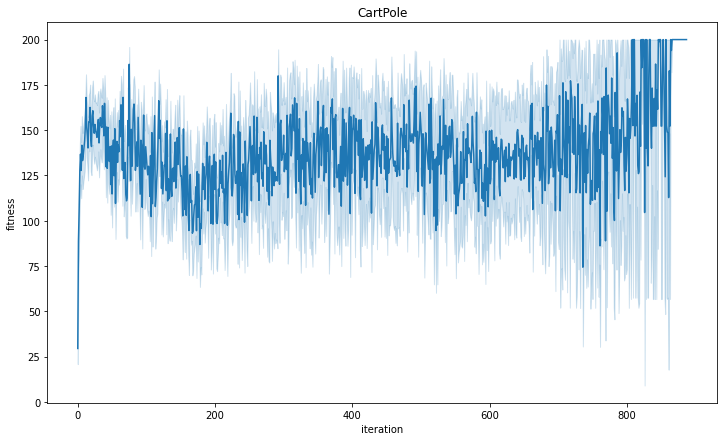

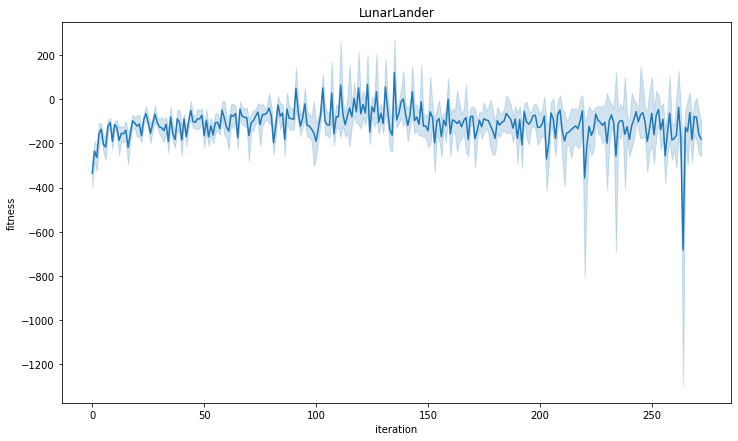

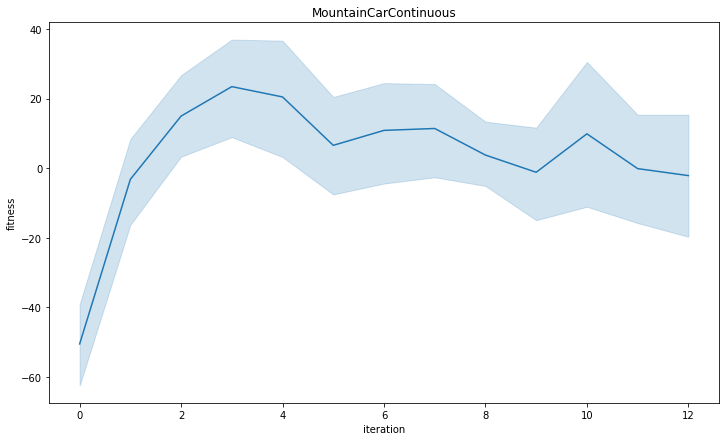

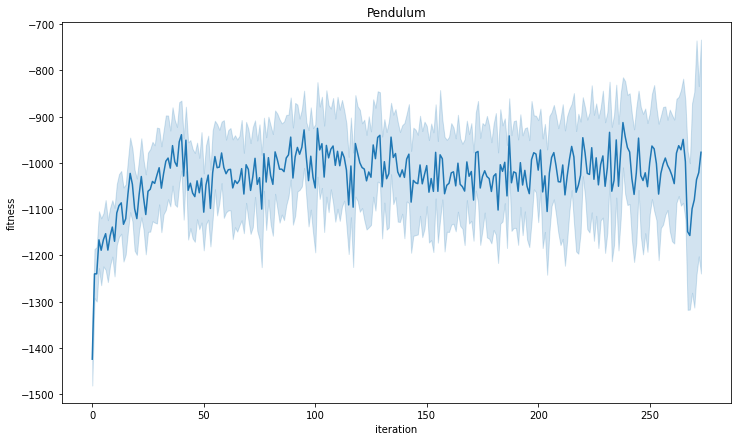

""


In [4]:
df = load_neat_logs(LOGDIR)
max_fitness_df = df.loc[df.groupby(['env', 'iteration', 'start_time'])['fitness'].idxmax()]
max_fitness_df.groupby('env').apply(plot_environment)

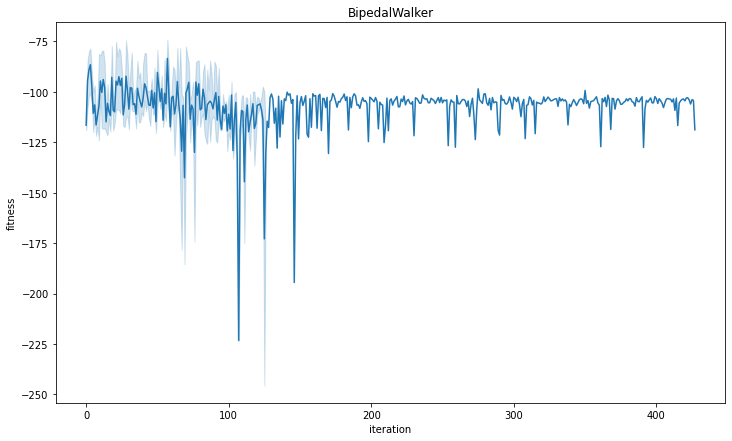

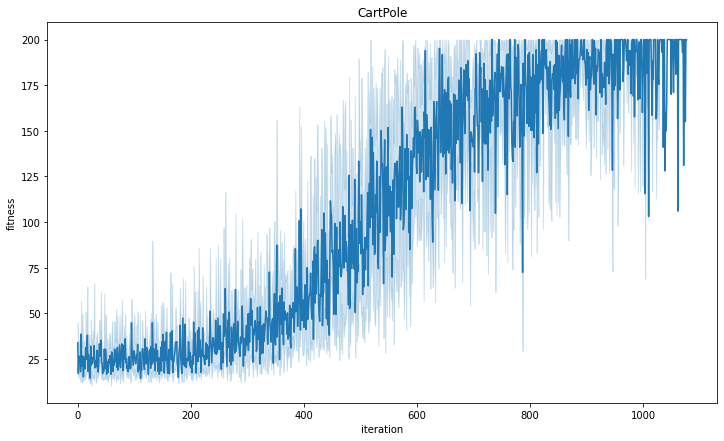

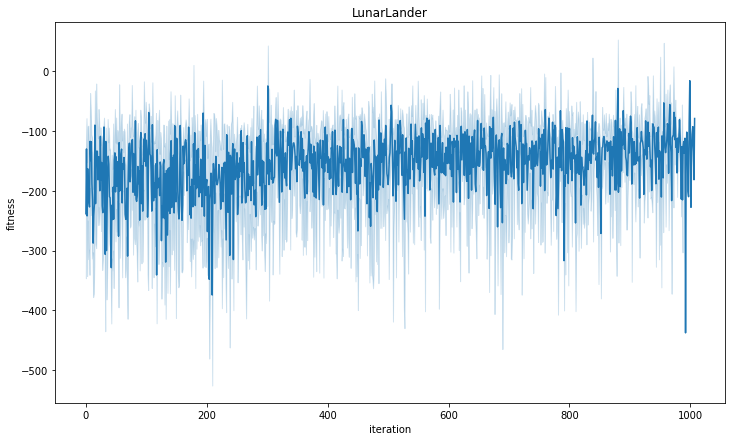

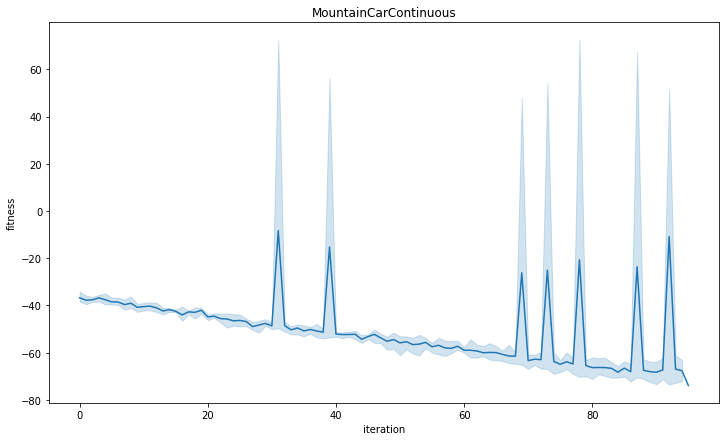

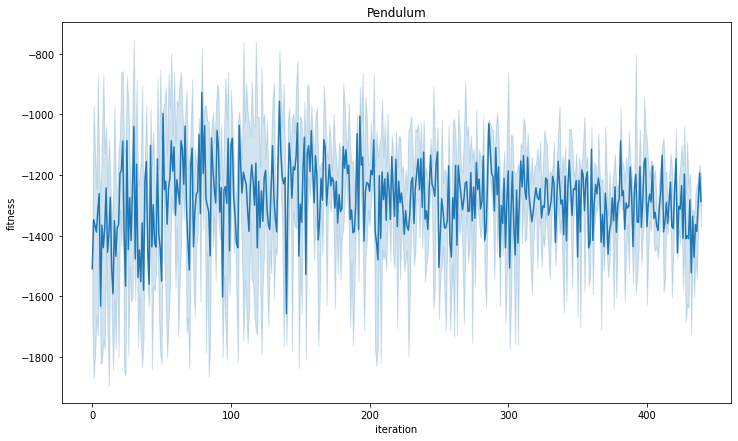

""


In [5]:
load_ac_logs(AC_LOGDIR).groupby(['env']).apply(plot_environment)